In [1]:
#  Data Analytics I
# Create a Linear Regression Model using Python/R to predict home prices using Boston Housing
# Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains
# information about various houses in Boston through different parameters. There are 506 samples
# and 14 feature variables in this dataset.

# The objective is to predict the value of prices of the house using the given features.

In [1]:
# Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('HousingData.csv')

In [3]:
# DataSet Info
data.shape

(506, 14)

In [4]:
data.size

7084

In [5]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
# Fill the missing values
data.fillna(data.mean(), inplace=True)

In [8]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [12]:
# Linear Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [16]:
# Split data into features and target
X = data.drop(['MEDV'], axis=1)
y = data['MEDV']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)

In [21]:
mse

34.987389544238766

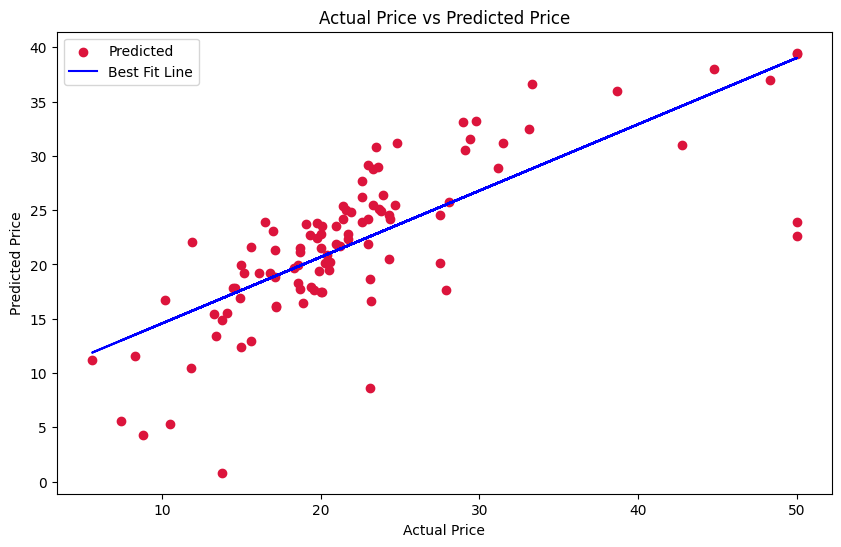

Slope: 0.6111, Intercept: 8.457, Equation: y = 0.61*x + 8.46


In [27]:
# PLotting Predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='crimson', label='Predicted')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, c='blue', label='Best Fit Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.legend()

plt.show()
print(f"Slope: {round(m,4)}, Intercept: {round(b,4)}, Equation: y = {round(m,2)}*x + {round(b,2)}")


In [ ]:
# Assignment number 4:
# Load the Boston Housing dataset
# Display basic information
# Display statistical information
# Display null values
# Fill the null values
# Feature Engineering through correlation matrix
# Build the Linear Regression Model and find its accuracy score
# Remove outliers and again see the accuracy of the model
#---------------------------------------------------------------------------------------
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#---------------------------------------------------------------------------------------
def RemoveOutlier(df,var):
Q1 = df[var].quantile(0.25)
Q3 = df[var].quantile(0.75)
IQR = Q3 - Q1
high, low = Q3+1.5*IQR, Q1-1.5*IQR
print("Highest allowed in variable:", var, high)
print("lowest allowed in variable:", var, low)
count = df[(df[var] > high) | (df[var] < low)][var].count()
print('Total outliers in:',var,':',count)
df = df[((df[var] >= low) & (df[var] <= high))]
return df
#---------------------------------------------------------------------------------------
def BuildModel(X, Y):
# 1. divide the dataset into training and testing 80%train 20%testing
# 2. Choose the model (linear regression)
# 3. Train the model using training data
# 4. Test the model using testing data
# 5. Improve the performance of the model
# Training and testing data
from sklearn.model_selection import train_test_split
# Assign test data size 20%
xtrain, xtest, ytrain, ytest =train_test_split(X,Y,test_size= 0.20, random_state=0)
# Model selection and training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(xtrain,ytrain) #Training
#Testing the model & show its accuracy / Performance
ypred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
print('MAE:',mean_absolute_error(ytest,ypred))
print("Model Score:",model.score(xtest,ytest))
#---------------------------------------------------------------------------------------

# Reading dataset
df = pd.read_csv('Boston.csv')
# Display basic information
print('Information of Dataset:\n', df.info)
print('Shape of Dataset (row x column): ', df.shape)
print('Columns Name: ', df.columns)
print('Total elements in dataset:', df.size)
print('Datatype of attributes (columns):', df.dtypes)
print('First 5 rows:\n', df.head().T)
print('Last 5 rows:\n',df.tail().T)
print('Any 5 rows:\n',df.sample(5).T)
#---------------------------------------------------------------------------------------
# Display Statistical information
print('Statistical information of Numerical Columns: \n',df.describe().T)
#---------------------------------------------------------------------------------------
# Display Null values
print('Total Number of Null Values in Dataset:', df.isna().sum())
#---------------------------------------------------------------------------------------
# Feature Engineering - find out most relevant features to predict the output
# output is price of the house in boston housing dataset
# Display correlation matrix
sns.heatmap(df.corr(),annot=True)
plt.show()
# we observed that lstat, ptratio and rm have high correlation with cost of flat (medv)
# avoid variables which have more internal correlation
# lstat and rm have high internal correlation
# avoid lstat and rm together
# 1. lstat, ptratio
# 2. rm, ptratio
# 3. lstat, rm, ptratio
# #---------------------------------------------------------------------------------------
# Choosing input and output variables from correlation matrix
X = df[['ptratio','lstat']] #input variables
Y = df['medv'] #output variable
BuildModel(X, Y)
#---------------------------------------------------------------------------------------
# Checking model score after removing outliers
fig, axes = plt.subplots(1,2)
sns.boxplot(data = df, x ='ptratio', ax=axes[0])
sns.boxplot(data = df, x ='lstat', ax=axes[1])
fig.tight_layout()
plt.show()
df = RemoveOutlier(df, 'ptratio')
df = RemoveOutlier(df, 'lstat')
# Choosing input and output variables from correlation matrix

X = df[['ptratio','lstat']]
Y = df['medv']
BuildModel(X, Y)
# after feature engineering selecting 3 variables
# Choosing input and output variables from correlation matrix
X = df[['rm','lstat', 'ptratio']]
Y = df['medv']
BuildModel(X, Y)

In [10]:
Heatmap of Correlation Matrix
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(),annot=True)
plt.show()


x = df.get(["LSTAT","RM"])
x.shape
(506, 2)
y = df["MEDV"]
y.shape
(506,)
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=5,test_size=0.2)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
LinearRegression()
y_pred = model.predict(x_test)
trueAndPred = list(zip(y_test,y_pred))
print(*trueAndPred)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
meanAbsErr = mean_absolute_error(y_test,y_pred)
rootMeanSquErr = np.sqrt(mean_squared_error(y_test,y_pred))
meanSquErr = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

Model Evaluation of Test Set
print("Model Evaluation")
print(f"Mean Absolute Error is: {meanAbsErr}")
print(f"Root Mean Square Error is: {rootMeanSquErr}")
print(f"Mean Squared Error: {meanSquErr}")
print(f"r2 Score is: {r2}")
Model Evaluation
Mean Absolute Error is: 3.7913102133431047
Root Mean Square Error is: 5.137400784702911
Mean Squared Error: 26.39288682266609
r2 Score is: 0.6628996975186952
# plt.scatter(x_test,y_test,color='black')
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)
m,b = np.polyfit(y_test,y_pred,1)
plt.plot(y_test,m*y_test+b,color='red',linewidth='2')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Linear Regression")
plt.grid()
plt.show()
print(f"Slope: {round(m,4)}")
print(f"Y-intercept: {round(b,4)}")
print(f"Equation of line: y = {round(m,2)}x + {round(b,2)}")

SyntaxError: invalid syntax (1737733236.py, line 1)